# 1.  **IMPORTING REQUIRED MODULES/LIBRARIES**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

#2.  **Data Acquisition**

In [ ]:
# Importing dataset
path= "https://raw.githubusercontent.com/snakessilver/Fetal-Health/main/fetal_health.csv"
df= pd.read_csv(path)

In [ ]:
# Displaying the first 5 lines of dataset
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
# Displaying the number of columns and the column names in the dataset
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

# 3. **Understanding : Data Analysis and Visualization**

In [ ]:
# Checking number of rows and columns
df.shape

(2126, 22)

In [ ]:
# Checking for missing values and categorical variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**Observation : Datatype of all the features are float64 which means it will works well with the model building. The data set has numerical values and not categorical data .**

* Discriptive statistics

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


From the above output we can understand the count of values , the mean values , the standard deviation, minimum values, maximun values and the three quartile values for various columns. From the 3 quartile values of all the columns we can say that the quartile values are quite near to each other i.e. there is less differnce between them so the data points are also near to each other.

* Evaluating Target Feature

In [ ]:
df["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

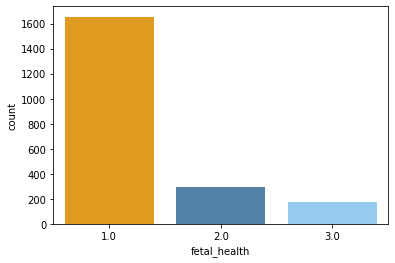

In [ ]:
# Target class value visualisation
sns.countplot(data= df, x="fetal_health", palette=["#FFA500","#4682B4", "#87CEFA"])
plt.show()

Target labels are highly imbalanced as can be seen from the plot. The value of 

# Wrangling 1

As per problem statement only those features are to be filtered and used

In [ ]:
# Selecting features as mentioned in problem statement
feature_columns= ['baseline value',"fetal_movement",'uterine_contractions',
       'light_decelerations',
       'severe_decelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability','fetal_health']

df = df[feature_columns]


In [ ]:
df.describe()

,baseline value,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.304327
std,9.840844,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
25%,126.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,1.000000
50%,133.000000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.000000
75%,140.000000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.000000
max,160.000000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,3.000000




*   Check for Missing Data



In [ ]:
#looking for missing values
df.isnull().sum()

baseline value                     0
fetal_movement                     0
uterine_contractions               0
light_decelerations                0
severe_decelerations               0
prolongued_decelerations           0
abnormal_short_term_variability    0
fetal_health                       0
dtype: int64

**Observation** : This shows that the data has no missing values


* Correlation Analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

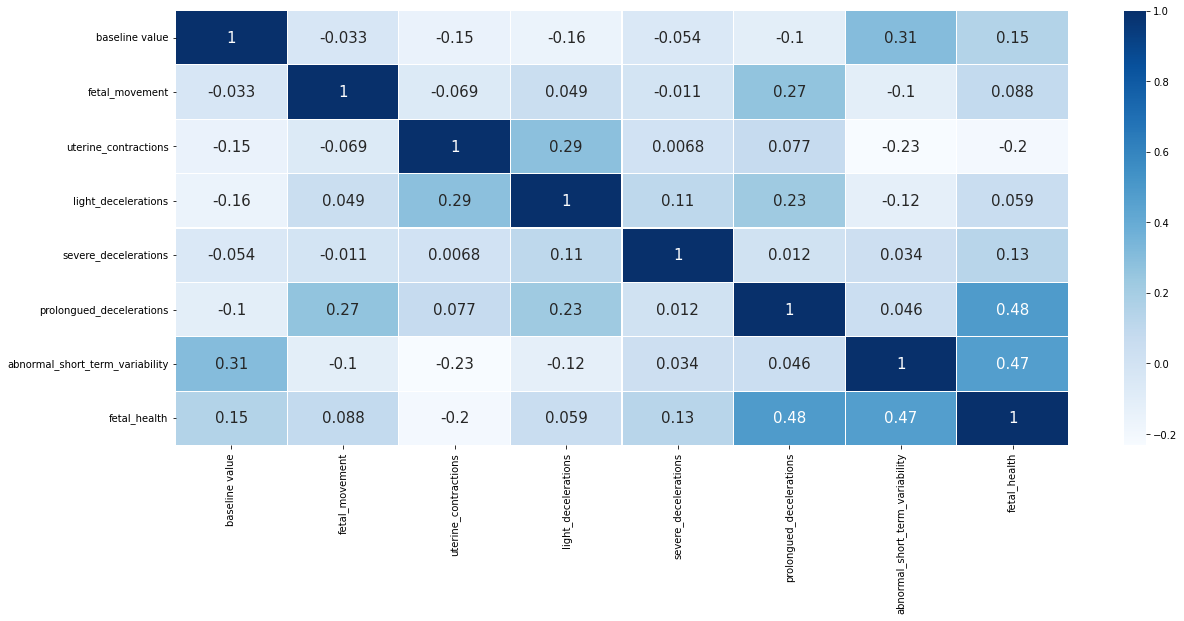

In [ ]:

# Performing correlation analysis
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 15})
plt.yticks(rotation=0)


We can observe the following things from the above correlation matrix:
* Not any column in strong corelated  hence we dont need to drop any columns 

# Wrangling 2


StandardScaler : As since in df.describe() - Some columns are having high values and some columns are having extremely low values and are in same range, hence we need to scale some of the columns so that they all in same range and also in order to achieve better predict score with most precision.

In [ ]:
df.describe()

,baseline value,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.304327
std,9.840844,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
25%,126.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,1.000000
50%,133.000000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.000000
75%,140.000000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.000000
max,160.000000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,3.000000


In [ ]:
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]


col_names = list(X.columns)
s_scaler = StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe()


,baseline value,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,1.069490e-15,-1.336863e-17,-1.336863e-16,-5.347452e-17,6.684315e-18,1.336863e-17,-7.352747e-17
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.775197e+00,-2.032096e-01,-1.482465e+00,-6.384375e-01,-5.747560e-02,-2.687543e-01,-2.035639e+00
25%,-7.423728e-01,-2.032096e-01,-8.034341e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,-8.720881e-01
50%,-3.088439e-02,-2.032096e-01,-1.244037e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,1.169297e-01
75%,6.806040e-01,-1.389076e-01,8.941419e-01,3.752430e-01,-5.747560e-02,-2.687543e-01,8.150599e-01
max,2.713428e+00,1.010654e+01,3.610264e+00,4.429965e+00,1.739869e+01,8.208570e+00,2.327675e+00


In [ ]:
# Now we can see that they have been normalised into the range of 0-1
df.describe()

,baseline value,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.304327
std,9.840844,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
25%,126.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,1.000000
50%,133.000000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.000000
75%,140.000000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.000000
max,160.000000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,3.000000


* BoxPlot : Checking for Outliers

In [ ]:
def show_outliers(df):
    # boxplot will show the outliers in Q1 , Q3 , IQR and outliers
    plt.figure(figsize=(25,10))
    sns.boxplot(data=df, width=0.22)

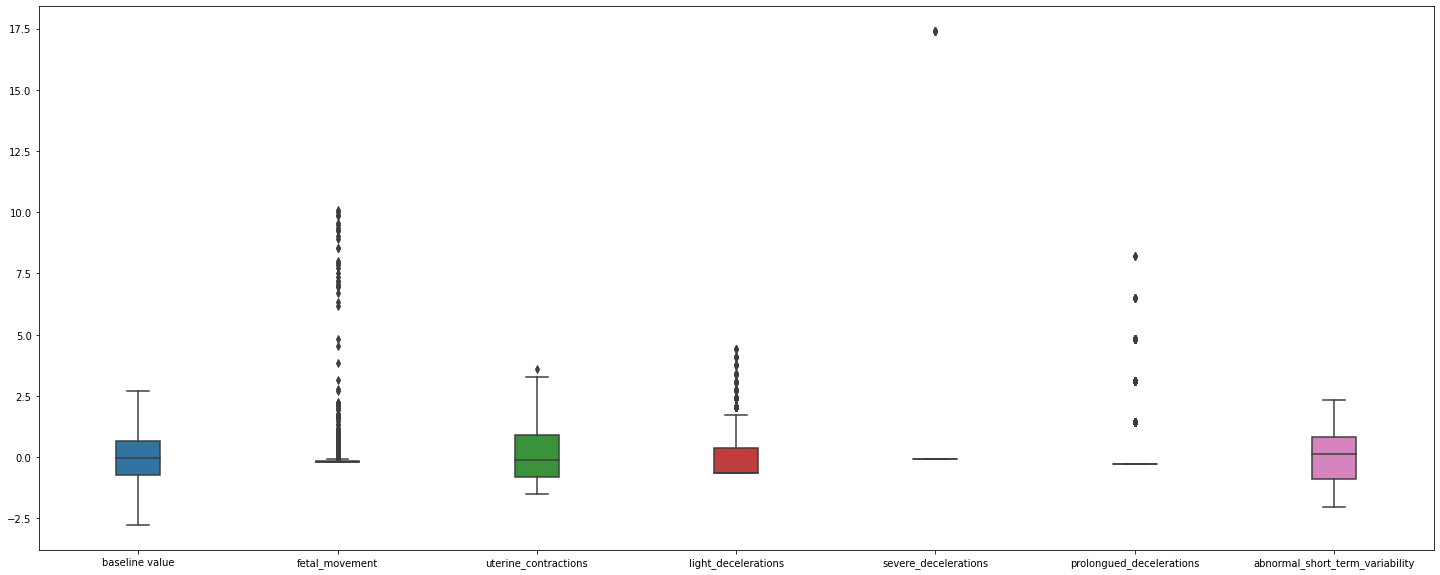

In [ ]:
# show the outliers and then decide and remove them
show_outliers(X_scaled)

* Outliers can be clearly be spotted in majorly of fetal_movement, prolongued decelerations, light decelerations.

which we have to make a call whether to take it along or drop it off.
* **Since this is medical field data , there can be positive case of having such data and its not human error , we will not drop them**. 

# 4. **Feature Selection**

 **We dont required any FE technique as features are already mentioned in problem statement :X :  baseline value, fetal_movement , uterine_contractions, light_decelerations, severe_decelerations, prolongued_decelerations, abnormal_short_term_variability and Y : fetal_health**

# 5. **MODEL BUILDING**

**Split the data as mentioned in problem statement**

In [ ]:
# Set Training and Testing Data as per mentioned criteria of 70 % training and 30 % test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (1488, 7)
Shape of testing feature: (638, 7)
Shape of training label: (1488,)
Shape of testing label: (638,)


DecisionTreeClassifier : As given in problem statement , need to apply this model and check /evaluate the model.

Decision Tree - It has many parameters to choose to decide which is best fit for a given dataset. 
Example of parameters to choose are:
 

1.   Best Split (Function to measure the quality of a split ) : Gini / Entropy 
Default being Gini in below sklearn.DecisionTreeClassifier

2.   max_depth:  maximum depth of tree for which split has to be carried out . It can lead to overfitting if we choose to high value.

3. min_samples_split : minium smaples required to split the internal nodes . Default 2 . This is used to control over fitting but way too high lead to under fitting .

4. min_samples_leaf : minimum number of samples required to be at a leaf node . Default is 1 . This is also used to control over fitting by creating way too many small branches

Similarly we have many other parameters like min_weight_fraction_leaf , max_features, min_impurity_decrease etc . For our case we will try to find the best parameters by considering best_split , max_depth , min_sample_split, min_samples_leaf and keeping the randomness value same across .


In [ ]:
# Model fitting
decision_tree_clf = DecisionTreeClassifier(max_depth=2)
decision_tree_clf.fit(X_train, y_train)
y_train_pred = decision_tree_clf.predict(X_train)
y_test_pred = decision_tree_clf.predict(X_test)

In [ ]:
# Below is overall accuracy score of default hyper parameters decision tree  classifier on train and test data . 
# We can use these to compare with best parameter decision tree classifier result.
print("Accuracy score for Default DecisionTreeClassifier on train data: ", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Confusion matrix for Default DecisionTreeClassifier on train  data \n", metrics.confusion_matrix(y_test, y_test_pred))


Accuracy score for Default DecisionTreeClassifier on train data:  81.65322580645162
Confusion matrix for Default DecisionTreeClassifier on train  data 
 [[487   0   3]
 [ 93   0   3]
 [ 31   0  21]]


# 6. Model Evaluation

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred, average='macro')
    rec = metrics.recall_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

   # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,'cm': cm}

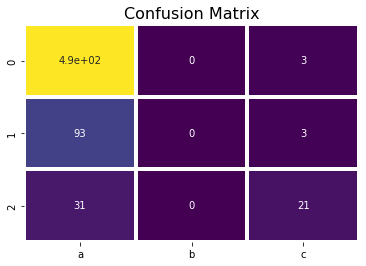

In [ ]:
# Model Evaluation on test dataset
dt_evaluate = evaluate_model(decision_tree_clf , X_test, y_test)


# Getting the Confusion matrix
sns.heatmap(dt_evaluate['cm'], annot=True, cmap='viridis', cbar=False, linewidths=3, linecolor='w', xticklabels=['a','b','c'])
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

Confusion matrix is performance measure of the ML model . It has 4 different combinations of predicted and actual values.

Calculations of the Confusion matrix are provided in the document file since the value might change after changing some parameters.

The Confusion matrices values are :
> True Positive:You predicted positive and it’s true
> True Negative:You predicted negative and it’s true.
> False Positive: (Type 1 Error):You predicted positive and it’s false.
> False Negative: (Type 2 Error):You predicted negative and it’s false.


Implications of Type 1 Error:  In this case we predicted fetal health is  normal but its normal actually. If this happens still the user can scan and get tests done . There wont be any harm.


Implications of Type 2 Error: In this case we predicted fetal health is not critical but its not normal actually .  It is more dangerous and can lead to dangerous feteous issues .

In [ ]:
# Model Accuracy based on Confusion Matrix
container = pd.DataFrame(pd.Series({'Accuracy':dt_evaluate['acc'],'Precision':dt_evaluate['prec'],'Recall':dt_evaluate['rec'],'F1 Score':dt_evaluate['f1']  }, name = 'Result') )
container

,Result
Accuracy,0.796238
Precision,0.524944
Recall,0.465908
F1 Score,0.472099


Observation: The Accuracy , Precision , Recall , F1 score are : 79 %, 52 % , 46 
% and 47 % respectively 



Classification Report : For all 3 classes

In [ ]:
print("Classification Report :\n")
y_pred = decision_tree_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# For Micro class, we will compute it
micro_prec = round(metrics.precision_score(y_test, y_pred, average='micro'),2)
micro_rec = round(metrics.recall_score(y_test, y_pred, average='micro'),2)
micro_f1 = round(metrics.f1_score(y_test, y_pred, average='micro'),2)
print(f'micro avg    \t {micro_prec} \t {micro_rec} \t {micro_f1}')

Classification Report :

              precision    recall  f1-score   support

         1.0       0.80      0.99      0.88       490
         2.0       0.00      0.00      0.00        96
         3.0       0.78      0.40      0.53        52

    accuracy                           0.80       638
   macro avg       0.52      0.47      0.47       638
weighted avg       0.68      0.80      0.72       638

micro avg    	 0.8 	 0.8 	 0.8


We can see that from Confuson matrix for macro and weighted avg , the model is not giving great results and is not a good sign. Hence we will try to fine tune hyper parameters and try checking performance of model.

**Finding Best DecisionTree Hyper Parameters** 

Tunning/Finding the best parameters like max_depth , best_fit(gini/entropy) , min_samples_leaf to improve accuracy and to avoid over and under fitting.
For these we will consider a sample hyper params list by picking the data in different data ranges and run different permutations on it. We should ideally have values in range list(range(1,len(X))) . But these values will consume lot of machine power and many combinations , hence we will randomanly pick certain values and try to find best fit parameters

In [ ]:
# Sample parameter's based with different max_depth , min_samples_leaf and best_split function of gini or entropy. 
sample_hyper_params = {
    'max_depth': [2, 3, 5, 6],
    'min_samples_leaf': [1, 4, 5, 6],
    'criterion': ["gini", "entropy"]
}

In [ ]:
decision_tree_clf = DecisionTreeClassifier()

# As we can see there are various combinations we need to try so as to arrive at best parameter combination giving highest accuracy . 
# Hence to solve this we shall use GridSearchCV. This will help us with trying different combinations .
# GridSearchCV which will take the algo , sample parameters etc as inputs and gives the various results like mean_test_score with every possible hyper params.
grid_search = GridSearchCV(estimator=decision_tree_clf, 
                           param_grid=sample_hyper_params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6],
                         'min_samples_leaf': [1, 4, 5, 6]},
             scoring='accuracy', verbose=1)

In [ ]:
# Printing  accuracy score of best decision tree on train and test data . 
best_decision_classifier = grid_search.best_estimator_
best_decision_tree_parameters = grid_search.best_params_
print("Accuracy score for Best DecisionTreeClassifier on train data: ", accuracy_score(y_train, best_decision_classifier.predict(X_train)) * 100)
print("Accuracy score for Best DecisionTreeClassifier on test  data", accuracy_score(y_test, best_decision_classifier.predict(X_test)) * 100)
print(f'\033[1mThe Best Parameters for Best DecisionTreeClassifier are : {best_decision_tree_parameters} \033[0m')


Accuracy score for Best DecisionTreeClassifier on train data:  91.59946236559139
Accuracy score for Best DecisionTreeClassifier on test  data 86.99059561128527
The Best Parameters for Best DecisionTreeClassifier are : {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1} 


In [ ]:
# Model Evaluation on test dataset
dt_evaluate = evaluate_model(best_decision_classifier , X_test, y_test)


container = pd.DataFrame(pd.Series({'Accuracy':dt_evaluate['acc'],'Precision':dt_evaluate['prec'],'Recall':dt_evaluate['rec'],'F1 Score':dt_evaluate['f1']  }, name = 'Result') )
container

,Result
Accuracy,0.869906
Precision,0.811794
Recall,0.682880
F1 Score,0.728005


In [ ]:
print("Classification Report :\n")
y_pred = best_decision_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

Classification Report :

              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       490
         2.0       0.63      0.58      0.61        96
         3.0       0.90      0.50      0.64        52

    accuracy                           0.87       638
   macro avg       0.81      0.68      0.73       638
weighted avg       0.87      0.87      0.86       638



As we can see from with and without hyper parameters tuning , with best parameters chosen for DecisionTree classifier we were able to achieve accuracy to 87 % and also in case of macro avg class , the precision has increased.